In [0]:
from fastai.vision import *

In [0]:
folder = 'gaming_laptop'
file = 'gaming_laptop.csv'

In [0]:
folder = 'gaming_pc'
file = 'gaming_pc.csv'

In [0]:
folder = 'smartphone'
file = 'smartphone.csv'

In [0]:
folder = 'tablet'
file = 'tablet.csv'

In [0]:
path = Path('drive/My Drive/bioInf/data')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [11]:
path.ls()

[PosixPath('drive/My Drive/bioInf/data/gaming_laptop.csv'),
 PosixPath('drive/My Drive/bioInf/data/tablet.csv'),
 PosixPath('drive/My Drive/bioInf/data/gaming_pc.csv'),
 PosixPath('drive/My Drive/bioInf/data/gaming_laptop'),
 PosixPath('drive/My Drive/bioInf/data/gaming_pc'),
 PosixPath('drive/My Drive/bioInf/data/tablet'),
 PosixPath('drive/My Drive/bioInf/data/models'),
 PosixPath('drive/My Drive/bioInf/data/smartphone.csv'),
 PosixPath('drive/My Drive/bioInf/data/smartphone'),
 PosixPath('drive/My Drive/bioInf/data/export.pkl')]

In [0]:
classes = ['gaming_laptop','gaming_pc','smartphone','tablet']

In [0]:
path = Path('drive/My Drive/bioInf/data')
dest = path/folder
download_images(path/file, dest, max_pics=160)

In [13]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=1000)

gaming_laptop


gaming_pc


smartphone


tablet


In [14]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

You can deactivate this warning by passing `no_check=True`.


/usr/local/lib/python3.6/dist-packages/fastai/basic_data.py:262: UserWarning: There seems to be something wrong with your dataset, for example, in the first batch can't access these elements in self.train_ds: 57,209,429,242,276...
  warn(warn_msg)


In [15]:
data.classes

['gaming_laptop', 'gaming_pc', 'smartphone', 'tablet']

In [16]:
data.show_batch(rows=3, figsize=(7,8))

RuntimeError: ignored

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['gaming_laptop', 'gaming_pc', 'smartphone', 'tablet'], 4, 433, 108)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [0]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.825526,0.700827,0.242991,00:05
1,1.177951,0.529496,0.149533,00:05
2,0.879738,0.526321,0.140187,00:05
3,0.707211,0.507291,0.149533,00:05


In [0]:
learn.save('stage-1')

In [0]:
learn.load('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


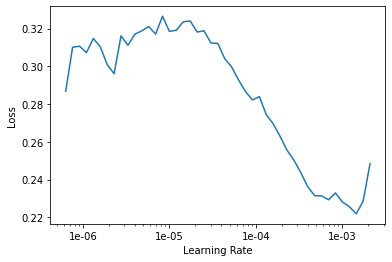

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(6, max_lr=slice(1e-4,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.279752,0.488078,0.130841,00:06
1,0.242608,0.439479,0.130841,00:06
2,0.223464,0.406762,0.112150,00:06
3,0.201783,0.409399,0.084112,00:06
4,0.185189,0.425370,0.093458,00:06
5,0.158576,0.419244,0.093458,00:06


In [0]:
learn.save('stage-2')

In [0]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (431 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
gaming_laptop,gaming_laptop,gaming_laptop,gaming_laptop,gaming_laptop
Path: drive/My Drive/bioInf/data;

Valid: LabelList (107 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
smartphone,gaming_laptop,tablet,gaming_laptop,smartphone
Path: drive/My Drive/bioInf/data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1

In [0]:
defaults.device = torch.device('cpu')
learn.export()

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

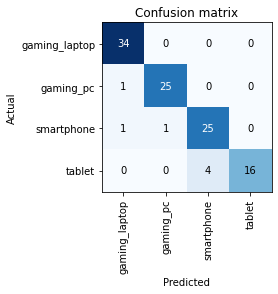

In [0]:
interp.plot_confusion_matrix()

NameError: ignored